In [1]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from rnn_model import RNNModel
from time_series_dataset import TimeSeriesDataset
from input_data import InputData
from trainer import Trainer
import numpy as np

In [2]:
data_path = "../../data/trusted/currency_exchange.csv"
scaler = MinMaxScaler()
sequence_length = 8
train_size_proportion = 0.8

In [3]:
input_data = InputData(
    data_path=data_path,
    sequence_length=sequence_length,
    train_size_proportion=train_size_proportion,
    scaler=scaler,
)

In [4]:
X_train, X_test, y_train, y_test = input_data.create_training_and_test_sets()

In [5]:
# Hyperparameters
input_size = 1
hidden_size = 128
output_size = 1
learning_rate = 0.001
num_epochs = 200
batch_size = 10
dropout = 0.5

In [6]:
# Create data loaders
train_dataset = TimeSeriesDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Initialize the model, loss function, and optimizer
model = RNNModel(input_size, hidden_size, output_size, dropout)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

trainer = Trainer(
    num_epochs=num_epochs,
    optimizer=optimizer,
    criterion=criterion,
    model=model,
    train_loader=train_loader,
    scaler=scaler,
)
trainer.train()

/home/camilo/.local/share/virtualenvs/estadistica-avanzada-9OTP0PJB/lib/python3.11/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch [1/200], Loss: 0.0044
Epoch [2/200], Loss: 0.0015
Epoch [3/200], Loss: 0.0024
Epoch [4/200], Loss: 0.001
Epoch [5/200], Loss: 0.0037
Epoch [6/200], Loss: 0.0017
Epoch [7/200], Loss: 0.0008
Epoch [8/200], Loss: 0.0031
Epoch [9/200], Loss: 0.001
Epoch [10/200], Loss: 0.0011
Epoch [11/200], Loss: 0.0015
Epoch [12/200], Loss: 0.0018
Epoch [13/200], Loss: 0.0005
Epoch [14/200], Loss: 0.0013
Epoch [15/200], Loss: 0.0014
Epoch [16/200], Loss: 0.0009
Epoch [17/200], Loss: 0.0026
Epoch [18/200], Loss: 0.0008
Epoch [19/200], Loss: 0.0029
Epoch [20/200], Loss: 0.0005
Epoch [21/200], Loss: 0.0002
Epoch [22/200], Loss: 0.0008
Epoch [23/200], Loss: 0.0014
Epoch [24/200], Loss: 0.0003
Epoch [25/200], Loss: 0.002
Epoch [26/200], Loss: 0.0016
Epoch [27/200], Loss: 0.001
Epoch [28/200], Loss: 0.0004
Epoch [29/200], Loss: 0.0008
Epoch [30/200], Loss: 0.0003
Epoch [31/200], Loss: 0.0013
Epoch [32/200], Loss: 0.0009
Epoch [33/200], Loss: 0.0008
Epoch [34/200], Loss: 0.0004
Epoch [35/200], Loss: 0.000

## Evaluación sobre el conjunto de datos de prueba


In [7]:
result = trainer.evaluate(X_test, y_test)
y_pred = result["y_pred"]
y_test = result["y_test"]

Root Mean Squared Error (RMSE): 0.007346066137549427
Mean Absolute Error (MAE): 0.01
Mean Absolute Percentage Error (MAPE): 0.34%


## Gráficas de los valores predichos vs reales


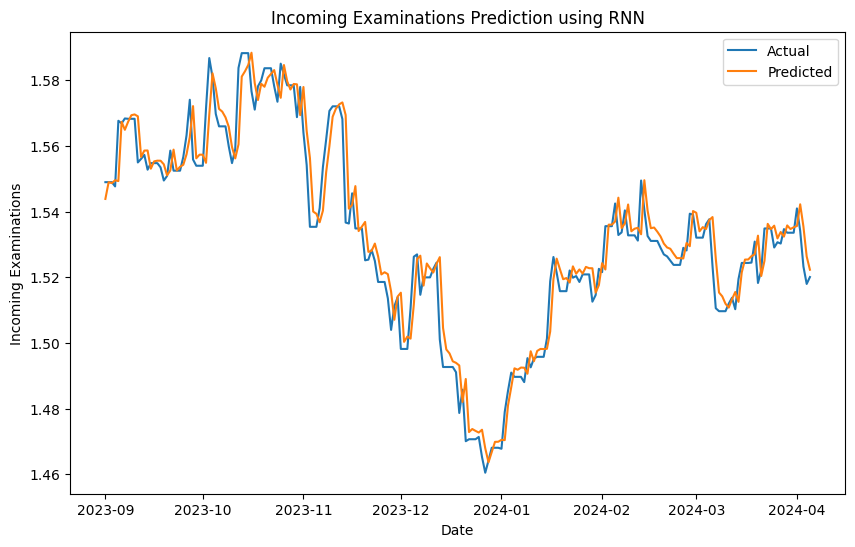

In [8]:
# Visualize predictions against actual data
df = input_data.df
train_size = input_data.train_size
plt.figure(figsize=(10, 6))
plt.plot(df.index[train_size + sequence_length :], y_test, label="Actual")
plt.plot(df.index[train_size + sequence_length :], y_pred, label="Predicted")
plt.xlabel("Date")
plt.ylabel("Incoming Examinations")
plt.title("Incoming Examinations Prediction using RNN")
plt.legend()
plt.show()

In [9]:
y_train_model = trainer.model(torch.tensor(X_train, dtype=torch.float32)).detach().numpy()
y_total_pred = np.append(y_train_model, y_pred)
y_total_actual = np.append(y_train, y_test)

In [10]:
len(y_total_pred)

1088

In [11]:
len(y_total_actual)

1088

In [12]:
len(df.index)

1096

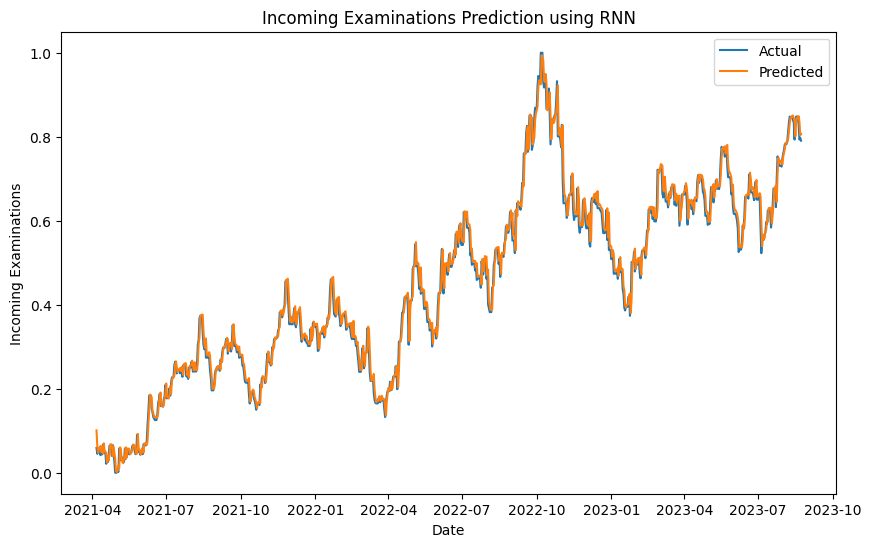

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(df.index[:train_size], y_train, label="Actual")
plt.plot(df.index[:train_size], y_train_model, label="Predicted")
plt.xlabel("Date")
plt.ylabel("Incoming Examinations")
plt.title("Incoming Examinations Prediction using RNN")
plt.legend()
plt.show()

## Conclusiones

**Ajuste del Modelo**: El uso de dropout a un nivel de 0.5 sugiere que estás intentando prevenir el sobreajuste permitiendo que el modelo sea menos sensible a la variabilidad específica del conjunto de entrenamiento. El gráfico muestra que, a pesar del alto dropout, las predicciones aún siguen de cerca los valores reales, lo cual es un indicativo positivo de que el modelo generaliza bien.

**Rendimiento de Predicción**: La línea naranja (predicha) sigue de cerca la línea azul (real), lo cual indica que el modelo tiene un buen rendimiento en la predicción de la serie temporal proporcionada. Las predicciones reflejan la tendencia general y los movimientos del valor real a través del tiempo.

**Implementación y Monitoreo**: Antes de desplegar este modelo para uso en tiempo real, sería prudente establecer un sistema de monitoreo que permita detectar cambios en el rendimiento a tiempo y ajustar el modelo según sea necesario.